# **APA - Correlation Analysis**
# DATA 3300


## Name: Chance Wiese

## Q1

First, load the required libraries then import the dataset. Produce a heading of the data and then consider which variables need to be removed prior to running a correlation analysis. Subset the dataframe to include only those variables that can be included, then generate histograms for each of those variables.


In [1]:
# replace with code to load pandas, matplotlib.pyplot, and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats #this library will be used to transform variables

In [3]:
# replace with code to import dataset
df = pd.read_excel("/content/faculty_s24.xlsx")
# replace with code to preview data
df.head()

,facid,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,gender,tenure-track,courserate,gpa,lrnoutcome
0,1,6,6,5,5,2,2,4,2,2,2,2,female,y,4.654,2.865,5.5
1,2,4,5,3,3,4,4,3,4,2,3,2,female,n,3.598,2.399,5.5
2,3,4,4,2,3,3,3,3,2,1,2,2,female,y,3.355,2.269,3.0
3,4,4,4,4,4,2,2,2,2,2,3,3,male,n,4.234,2.863,4.2
4,5,6,7,4,5,3,3,3,2,2,1,2,male,y,4.875,3.650,5.3


Explain which columns need to be dropped (and why) prior to a correlation analysis.

facid, gender, and tenure track because we don't need to use them in comparison. They are categorical or the primary key.

In [4]:
# replace with code to select only columns that can be included in a correlation analysis OR drop out columns that cannot be included
df = df.drop(['facid', 'gender', 'tenure-track'], axis=1) # removes categorical variables and primary key
df.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,gpa,lrnoutcome
0,6,6,5,5,2,2,4,2,2,2,2,4.654,2.865,5.5
1,4,5,3,3,4,4,3,4,2,3,2,3.598,2.399,5.5
2,4,4,2,3,3,3,3,2,1,2,2,3.355,2.269,3.0
3,4,4,4,4,2,2,2,2,2,3,3,4.234,2.863,4.2
4,6,7,4,5,3,3,3,2,2,1,2,4.875,3.650,5.3


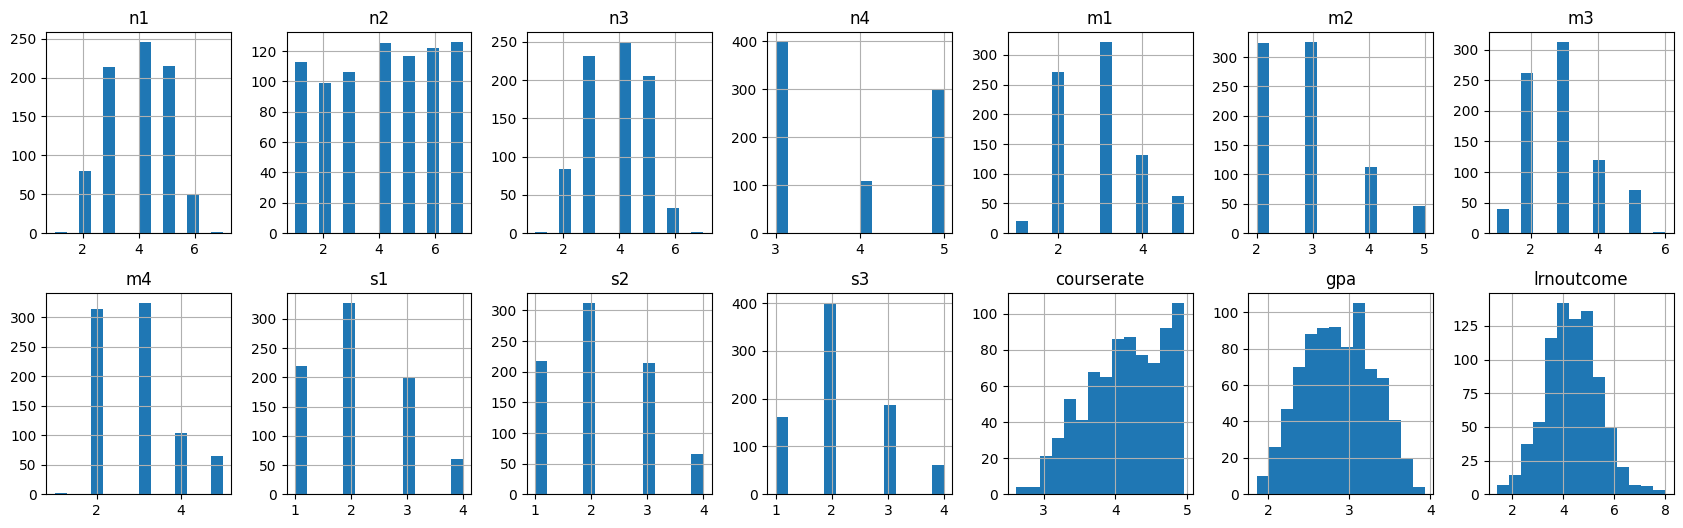

In [8]:
# replace with code to generate histograms on remaining 14 variables/columns. Hint: Change the layout values to accomodate 14 histograms.
df.hist(layout=(2,7), figsize=(21,6), bins=14) #generates histograms of remaining numerical vars or variables
plt.show()

List the variables that are not normally distributed:
* n2, n4, m2, m4, courserate

How will you address these non-normally distributed vars?
* We'll transform them to make them more normally distributed

# Q2

**Generate correlation matrix colormap table, making sure to include all necessary steps:**

## A

**Transform skewed variables using a Box-Cox transformation, including `n4`, `courserate`, `m2`, and `m4`.**

In [9]:
# replace with code to create new transformed variables for n4, courserate, m2, and m4. Use the Box-Cox method.
df['n4_bc'] = stats.boxcox(df['n4'])[0]
df['m2_bc'] = stats.boxcox(df['m2'])[0]
df['m4_bc'] = stats.boxcox(df['m4'])[0]
df['courserate_bc'] = stats.boxcox(df['courserate'])[0]
#preview the headers
df.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,gpa,lrnoutcome,n4_bc,m2_bc,m4_bc,courserate_bc
0,6,6,5,5,2,2,4,2,2,2,2,4.654,2.865,5.5,0.823316,0.543575,0.599089,14.818360
1,4,5,3,3,4,4,3,4,2,3,2,3.598,2.399,5.5,0.681229,0.870784,1.043299,7.965376
2,4,4,2,3,3,3,3,2,1,2,2,3.355,2.269,3.0,0.681229,0.754749,0.599089,6.708581
3,4,4,4,4,2,2,2,2,2,3,3,4.234,2.863,4.2,0.769623,0.543575,0.599089,11.815349
4,6,7,4,5,3,3,3,2,2,1,2,4.875,3.650,5.3,0.823316,0.754749,0.599089,16.550293


array([[<Axes: title={'center': 'n1'}>, <Axes: title={'center': 'n2'}>,
        <Axes: title={'center': 'n3'}>, <Axes: title={'center': 'n4'}>],
       [<Axes: title={'center': 'm1'}>, <Axes: title={'center': 'm2'}>,
        <Axes: title={'center': 'm3'}>, <Axes: title={'center': 'm4'}>],
       [<Axes: title={'center': 's1'}>, <Axes: title={'center': 's2'}>,
        <Axes: title={'center': 's3'}>,
        <Axes: title={'center': 'courserate'}>],
       [<Axes: title={'center': 'gpa'}>,
        <Axes: title={'center': 'lrnoutcome'}>,
        <Axes: title={'center': 'n4_bc'}>,
        <Axes: title={'center': 'm2_bc'}>],
       [<Axes: title={'center': 'm4_bc'}>,
        <Axes: title={'center': 'courserate_bc'}>, <Axes: >, <Axes: >]],
      dtype=object)

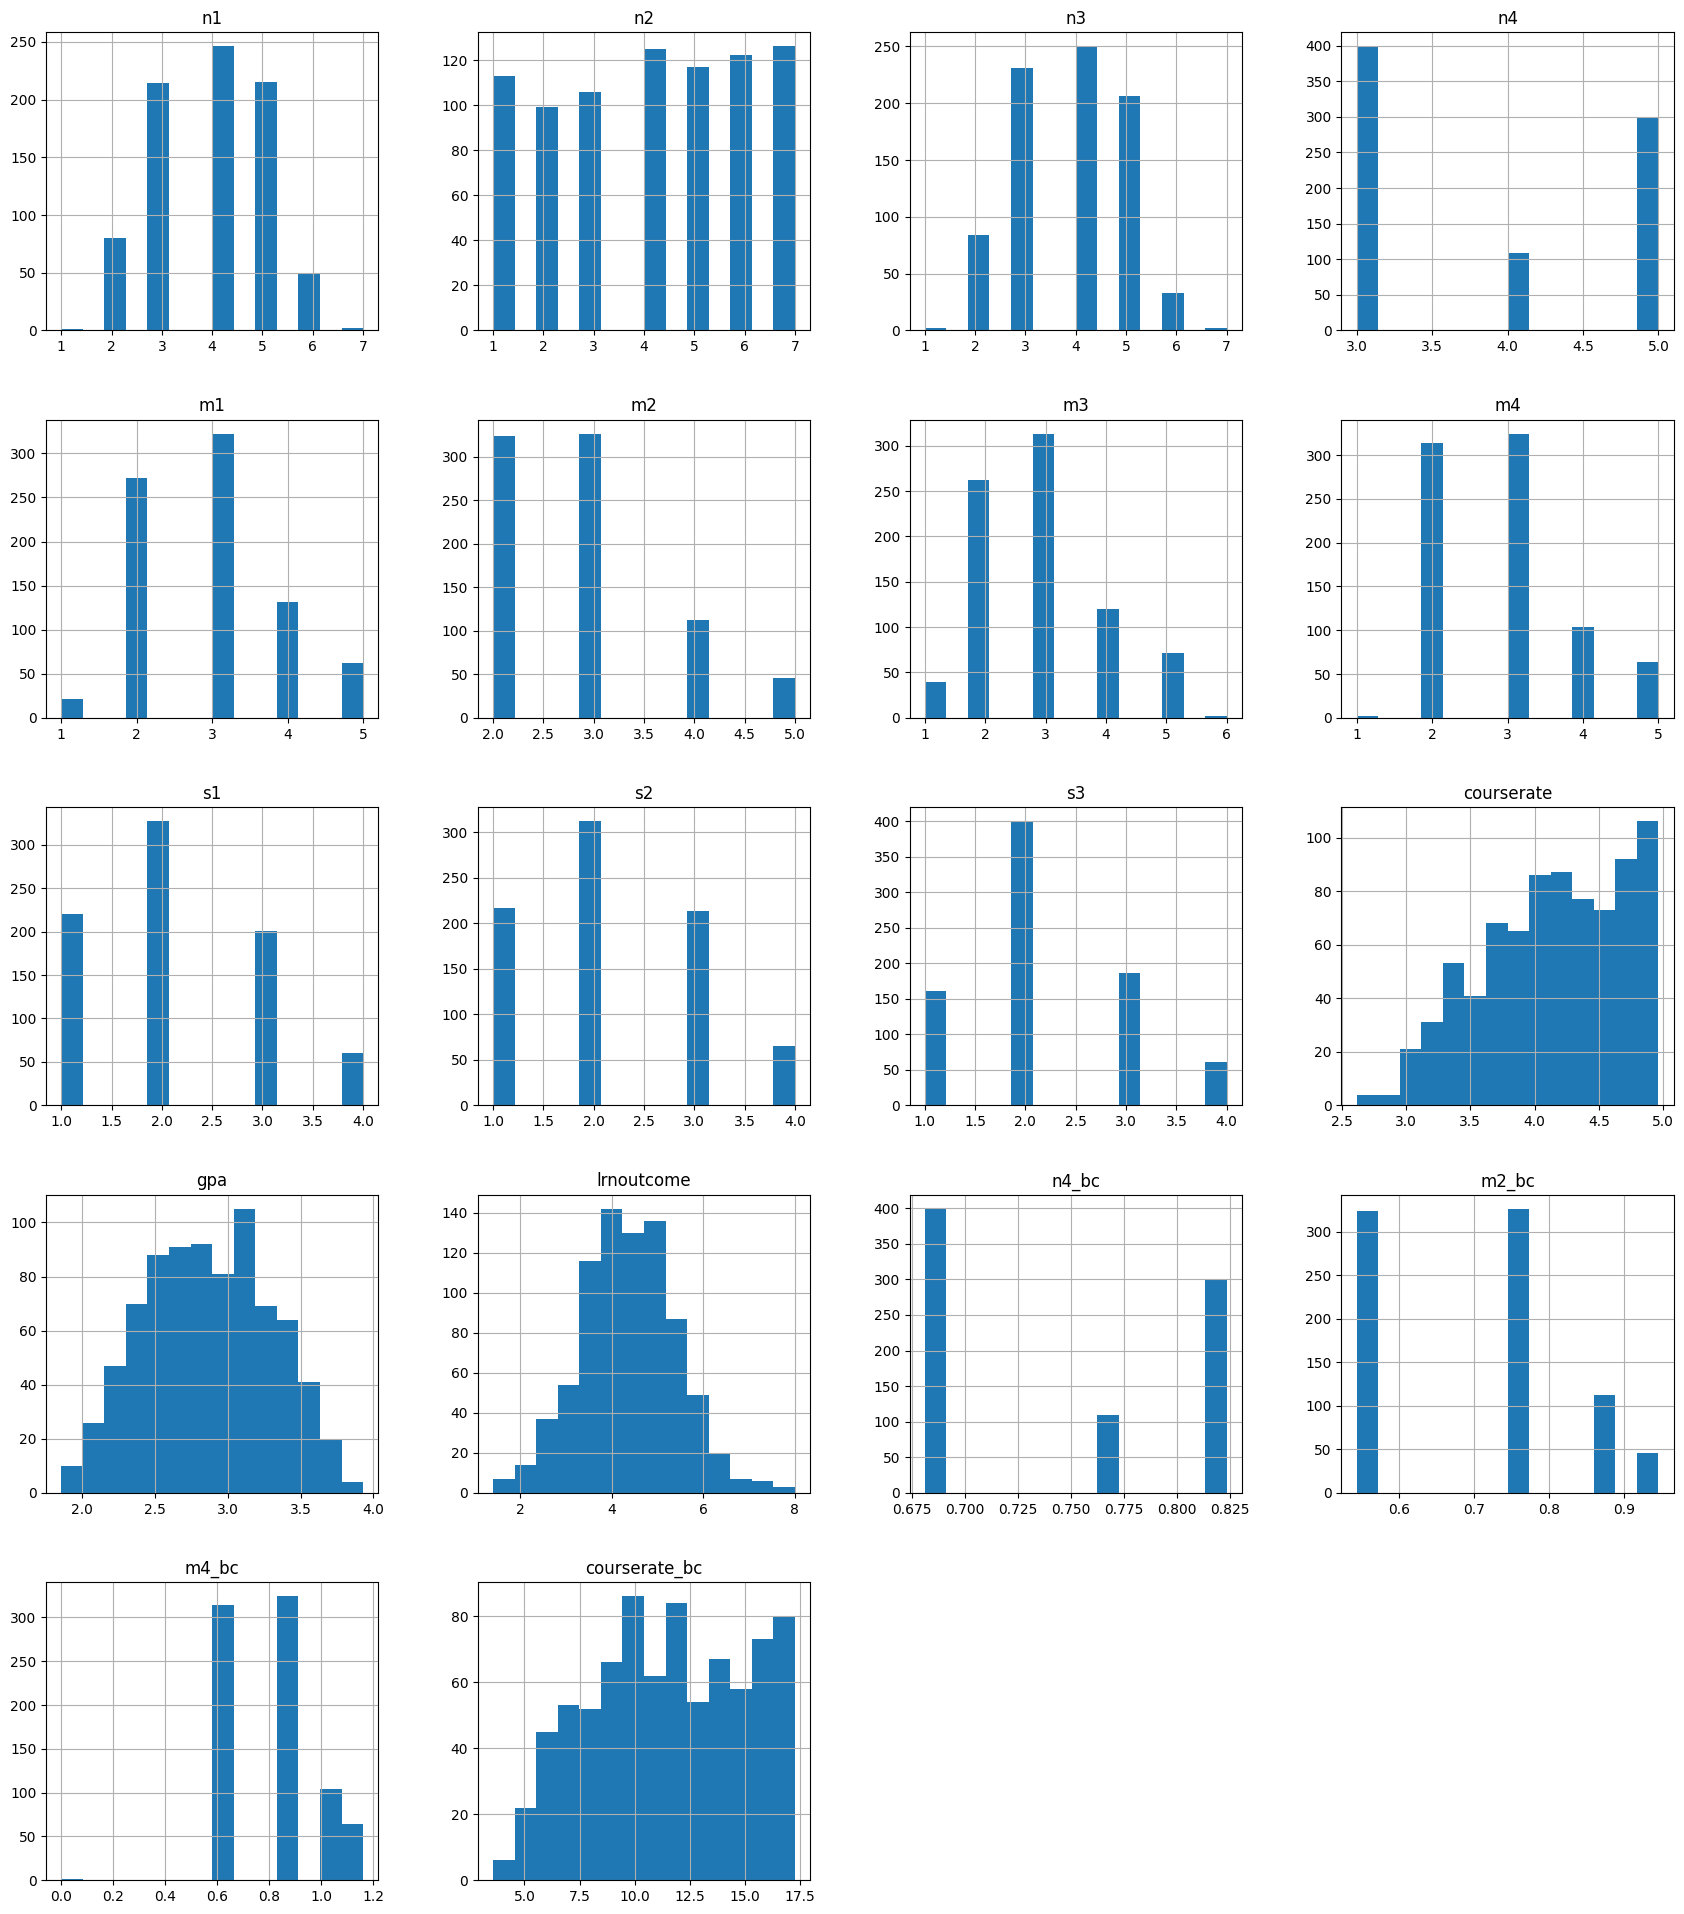

In [15]:
# replace with code to view histograms of transformed variables (it's okay to include the other variables as well, in which case use layout=(5,4))
df.hist(layout=(5,4), figsize=(21,24), bins=14)



**Are there any variables with distributions that cannot be made roughly normal? How could this impact the validity of the correlation analysis?**

**Note: Not all variables will be normally distributed after transformation. For the scope of this assignment, discuss which are or are not normally distributed and which did or did not improve.**



m2, m4, and n4 did not become roughly normal. Courserate's normality was improved. You could still move forward with the analysis but those results have outliers that skew the data. They are inconsistent.

## B

**Create a new data object subset (e.g., call it df_T) that contains your new transformed variables, and the original normally distributed variables.**

**Then, run the correlation matrix and display it in a color mapped table.**


In [16]:
# replace with code to create new data subset object that drops n4, courserate, m2, and m4
df_T = df.drop(['n4', 'courserate', 'm2', 'm4'], axis=1)
#preview the new data object subset
df_T.head()


,n1,n2,n3,m1,m3,s1,s2,s3,gpa,lrnoutcome,n4_bc,m2_bc,m4_bc,courserate_bc
0,6,6,5,2,4,2,2,2,2.865,5.5,0.823316,0.543575,0.599089,14.818360
1,4,5,3,4,3,2,3,2,2.399,5.5,0.681229,0.870784,1.043299,7.965376
2,4,4,2,3,3,1,2,2,2.269,3.0,0.681229,0.754749,0.599089,6.708581
3,4,4,4,2,2,2,3,3,2.863,4.2,0.769623,0.543575,0.599089,11.815349
4,6,7,4,3,3,2,1,2,3.650,5.3,0.823316,0.754749,0.599089,16.550293


In [18]:
# replace with code to create correlation matrix
cor_matrix = df_T.corr()
# replace with code to create color map table (cool-warm to show positive and negative correlations)
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,n1,n2,n3,m1,m3,s1,s2,s3,gpa,lrnoutcome,n4_bc,m2_bc,m4_bc,courserate_bc
n1,1.000000,-0.023274,0.593086,-0.052312,-0.046698,0.142333,0.175569,0.164980,0.378938,-0.141134,0.756801,-0.016960,-0.053495,0.433378
n2,-0.023274,1.000000,-0.015562,-0.048688,-0.029847,-0.044801,0.010102,-0.015859,-0.055277,0.016932,-0.028277,0.015070,0.014973,-0.023295
n3,0.593086,-0.015562,1.000000,-0.082005,-0.133956,0.117596,0.190751,0.145797,0.351759,-0.188219,0.748173,-0.072726,-0.050730,0.454429
m1,-0.052312,-0.048688,-0.082005,1.000000,0.482770,0.013620,-0.035312,0.010487,-0.165664,0.090698,-0.085604,0.469094,0.513999,-0.114718
m3,-0.046698,-0.029847,-0.133956,0.482770,1.000000,0.005768,-0.051190,-0.010966,-0.138520,0.055793,-0.076121,0.498956,0.491933,-0.063808
s1,0.142333,-0.044801,0.117596,0.013620,0.005768,1.000000,0.386782,0.412702,0.057388,-0.046934,0.211036,0.019938,-0.032552,-0.119162
s2,0.175569,0.010102,0.190751,-0.035312,-0.051190,0.386782,1.000000,0.425613,0.118516,-0.108051,0.264442,0.008583,0.002899,-0.085054
s3,0.164980,-0.015859,0.145797,0.010487,-0.010966,0.412702,0.425613,1.000000,0.091962,-0.123091,0.232208,0.018713,0.021291,-0.083928
gpa,0.378938,-0.055277,0.351759,-0.165664,-0.138520,0.057388,0.118516,0.091962,1.000000,-0.095224,0.449893,-0.141674,-0.160386,0.597946
lrnoutcome,-0.141134,0.016932,-0.188219,0.090698,0.055793,-0.046934,-0.108051,-0.123091,-0.095224,1.000000,-0.215014,0.064299,0.061891,0.092923


## C

**Based on your correlation analysis, what are the *three strongest positive* correlations? Next identify the *three strongest negative* correlations in the dataset. Provide both the item pairs as well as their correlation coefficient.**



**3 strongest positive**
* n4_bc - n1: 0.756801
* n4_bc - n3: 0.748173
* courserate_bc - gpa: 0.597946

**3 strongest negative**
* lrnoutcome - n4_bc: -0.215014
* lrnoutcome - n3: -0.188219
* m1 - gpa: -0.165664

## D
**What is the *third* highest $R^2$ value for any variable pair in the analysis?
What does this $R^2$ value tell us about the relationship between the two variables?**



In [19]:
# replace with code to calculate R^2 from r value
0.597946 ** 2

0.357539418916

It tells us that 35% of change in courserate_bc can be explained by gpa, and vice versa

## E
**What is convergent validity and when does it matter?**


The degree to which different measures of the same construct produce similar results. It matters when two variables have a highly correlated.

## F

**Assuming that an $r$ of 0.3 is required to demonstrate convergent validity, do the multiple items that make up each of the Narcissism (the *n* variables), Machiavellianism (the *m* variables), and Sociopathy (the *s* variables) measurements demonstrate convergent validity? Identify any attributes that do not converge adequately and report their $r$ values.**




* n1 - n2: 	-0.023274
* n2 - n4_bc: -0.028277
* n2 - n3: -0.015562

# Q3

## A
Create three new aggregate variables by averaging the coverging *m* variables to represent Machiavellianism, converging *n* variables to represent Narcissim, and the converging *s* variables to represent Sociopathy.

Next replace *df_T* with a new subset containing only those variables you want to run in the new correlation analysis *(hint: do we need s1-s3 if we include Sociopathy?)*

**Then run a new correlation matrix and display it in a colormap table.**


In [20]:
df_T['Mach'] = df[['m1','m2_bc','m3','m4_bc']].mean(axis=1) #create Machiavellianism aggregate
df_T['Nar'] = df[['n1','n3','n4_bc']].mean(axis=1) #create Narcicissm aggregate
df_T['Socio'] = df[['s1','s2','s3']].mean(axis=1) #create Sociopathy aggregate
df_T = df_T[['gpa', 'lrnoutcome', 'courserate_bc', 'Mach', 'Nar', 'Socio']] #subset to only include necessary variables in correlation matrix
df_T

,gpa,lrnoutcome,courserate_bc,Mach,Nar,Socio
0,2.865,5.5,14.818360,1.785666,3.941105,2.000000
1,2.399,5.5,7.965376,2.228521,2.560410,2.333333
2,2.269,3.0,6.708581,1.838460,2.227076,1.666667
3,2.863,4.2,11.815349,1.285666,2.923208,2.666667
4,3.650,5.3,16.550293,1.838460,3.607772,1.666667
...,...,...,...,...,...,...
803,3.064,2.8,9.233432,2.088460,2.227076,1.666667
804,2.215,3.7,7.570364,1.785666,2.893743,1.666667
805,3.058,5.0,11.239745,1.535666,2.227076,1.333333
806,2.213,4.7,4.357054,1.338460,2.560410,2.666667


In [21]:
# replace with code to create correlation matrix
cor_matrix2 = df_T.corr()
# replace with code to create color map table (cool-warm to show positive and negative correlations)cor_matrix2.style.background_gradient(cmap='seismic', axis=None, vmin=-1, vmax=1)
cor_matrix2.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,gpa,lrnoutcome,courserate_bc,Mach,Nar,Socio
gpa,1.000000,-0.095224,0.597946,-0.183845,0.412964,0.114890
lrnoutcome,-0.095224,1.000000,0.092923,0.086307,-0.186109,-0.118348
courserate_bc,0.597946,0.092923,1.000000,-0.102517,0.499348,-0.123705
Mach,-0.183845,0.086307,-0.102517,1.000000,-0.101398,-0.014940
Nar,0.412964,-0.186109,0.499348,-0.101398,1.000000,0.228953
Socio,0.114890,-0.118348,-0.123705,-0.014940,0.228953,1.000000


## B

**What are the *four* strongest correlations in the matrix? For each, give the item pair as well as the correlation coefficient.**



* courserate_bc - gpa: 0.597946
* nar - courserate_bc: 0.499348
* gpa - nar: 0.412964
* socio - nar: 0.228953

## C

**What hypotheses might you come up with based on the correlation coefficients found in your analysis? List three, include the relevant correlation coefficient(s), and suggest why the relationship(s) noted may exist (e.g., if you were to find a strong correlation between daytime temperature and lemonade sales, you might suggest that when the weather is hot, people may become more thirsty and therefore more interested in purchasing potentially refreshing drinks).**


* courserate and gpa have a correlation coefficient of 0.597946, meaning when someone likes a course, they get a better grade and vice versa
* nar and courserate have a correlation coefficient of 0.499348, meaning people with narcissism rate classes higher and enjoy them more
* nar and gpa have a high correlation coefficient of 0.412964, meaning people that get high grades are likely narcissistic.

# Q4

**Assume that we will want to use the *Learning Outcome variable as a dependent variable in a future analysis*. Using the correlation matrix from Part 3...**

## A
**Which independent variable (IV, any variable other than Learning Outcome) has the least influence on Learning Outcome? Indicate both the variable and the coefficient or $r$-value.**



Mach has the least affect with a correlation coefficient of 0.086307

## B

**Based on a multicollinearity threshold of $r = 0.57$, which IV pair would you want to check for multicollinearity? Indicate both the pair and the coefficient value.**

**Does it make sense that these two variables might be collinear?**


courserate and gpa with a correlation coefficient of 	0.597946. It makes sense as people enjoy classes when they get good grades and vice versa.

**Create a visualization to illustrate evidence of this correlation.**

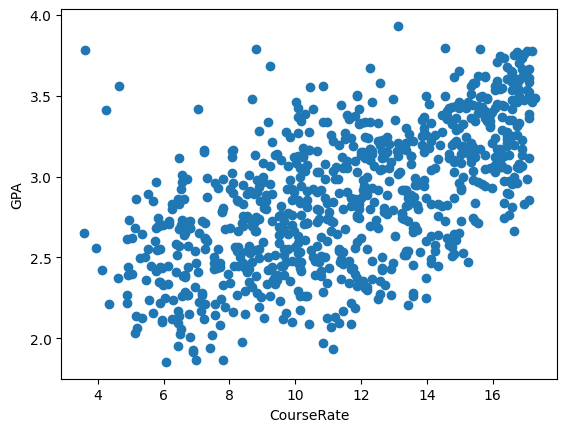

In [22]:
plt.scatter(df['courserate_bc'], df['gpa']) # replace 'Col_1' and 'Col_2' with the two variables you want to plot
# replace with code to add x-axis label
plt.xlabel("CourseRate")
plt.ylabel("GPA")
# replace with code to add y-axis label
plt.show()